In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import networkx as nx
import os
from reqs.measures import * 

# Import Data

In [2]:
gaming = nx.read_gexf('../data/23march_chur/graphs/gaming_network.gexf')

In [3]:
os.listdir('../data/17april/graphs/')

['antiwork.gexf']

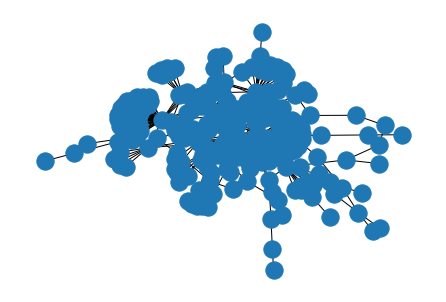

In [4]:
G = nx.read_gexf('../data/17april/graphs/antiwork.gexf')
graph = nx.to_undirected(G)
S = [graph.subgraph(c).copy() for c in sorted(nx.connected_components(graph), key=len, reverse=True)]
nx.draw(S[0])

In [5]:
def inspect_network(folder):
    print(folder)
    creation_date = str(input())
    df = pd.DataFrame(columns = ['name', 'scrape_date', '#nodes', '#edges', 'average_shortest_path_length', 'Generalized_euclidean', 'Our_polarity_score'])
    for file in os.listdir(folder):
        graph = nx.read_gexf(folder+file)
        graph = nx.to_undirected(graph)
        S = [graph.subgraph(c).copy() for c in sorted(nx.connected_components(graph), key=len, reverse=True)]
        graph = S[0]
        name = file[:-5]

        attr_dict = {
            'name' : name,
            'scrape_date' : creation_date, 
            '#nodes' : len(graph.nodes()),
            '#edges' : len(graph.edges()),
            'average_shortest_path_length' : nx.average_shortest_path_length(graph),
            'Generalized_euclidean' : do_ge(graph),
            'Our_polarity_score' : driver_g(graph) 
        }
        df = df.append(attr_dict, ignore_index = True)
    return df

In [11]:
april_2nd = inspect_network('../date_folders/data/2april/graphs/')
new_df = inspect_network('../date_folders/data/4april/graphs/').append(april_2nd)
new_df = inspect_network('../date_folders/data/17april/graphs/').append(new_df)
new_df = inspect_network('../date_folders/data/23march_chur/graphs/').append(new_df)


../date_folders/data/2april/graphs/


FileNotFoundError: [Errno 2] No such file or directory: '../date_folders/data/2april/graphs/'

In [10]:
new_df

,name,scrape_date,#nodes,#edges,average_shortest_path_length,Generalized_euclidean,Our_polarity_score
0,antiwork,april_17,248,333,3.553742,89.264635,0.06364
0,gaming,april_4,169,195,4.84707,65.971846,0.274736
0,music,april_2,45,51,3.739394,42.964094,0.097333


# Calculate stats per Network

# Check Correlations

# lineplots?